# Team 1 - Chocolate Bar

![](https://img.newatlas.com/cocoa-tree-domestication-chocolate-1.jpg?auto=format%2Ccompress&ch=Width%2CDPR&fit=crop&h=347&q=60&rect=0%2C18%2C1620%2C911&w=616&s=2c0f902d21b734d77c99fd13171fb979)

_For more information about the dataset, read [here](https://www.kaggle.com/rtatman/chocolate-bar-ratings)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of poorly labeled data in `Broad Bean Origin` column.
- There are some rows in `Broad Bean Origin` with multiple values, those values will create errors in our data. 
- How can we get rid of the `%` sign in `Cocoa Percent` column?
- And more...

In [1]:
# khai báo thư viên
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [2]:
# Load dữ liệu
# Thay đổi link khi tải về
link = "D:/virtualTest/linear_regression/assignments/data/01-chocolate-bar/chocolate.csv"
data=pd.read_csv(link)

In [19]:
data.head(5)

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [20]:
# Xem kiểu dữ liệu từng cột
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company 
(Maker-if known)           1795 non-null object
Specific Bean Origin
or Bar Name    1795 non-null object
REF                                 1795 non-null int64
Review
Date                         1795 non-null int64
Cocoa
Percent                       1795 non-null object
Company
Location                    1795 non-null object
Rating                              1795 non-null float64
Bean
Type                           1794 non-null object
Broad Bean
Origin                   1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [21]:
# Thay đổi tên cột để dễ thao tác phía sau
# Vì tên các cột xuống dòng lung tung
data.rename({'Company\xa0\n(Maker-if known)': 'Company (Maker-if known)', 'Specific Bean Origin\nor Bar Name': 'Specific Bean Origin or Bar Name', 'Review\nDate': 'Review Date', 'Cocoa\nPercent': 'Cocoa Percent', 'Company\nLocation': 'Company Location', 'Bean\nType': 'Bean Type', 'Broad Bean\nOrigin': 'Broad Bean Origin'}, axis=1, inplace=True)

In [22]:
# Tính tổng giá trị null trong  cột
data.isna().sum()

Company (Maker-if known)            0
Specific Bean Origin or Bar Name    0
REF                                 0
Review Date                         0
Cocoa Percent                       0
Company Location                    0
Rating                              0
Bean Type                           1
Broad Bean Origin                   1
dtype: int64

In [23]:
#Xóa các dòng dữ liệu rác của cột Broad Bean Origin
data=data[data['Broad Bean Origin']!='\xa0']

In [24]:
# Xóa các dòng nan của 2 cột Broad Bean Origin và Bean Type
data=data.dropna(how='any', subset=['Broad Bean Origin', 'Bean Type'])

In [25]:
# Kiểm tra giá trị nan lại
data.isna().sum()

Company (Maker-if known)            0
Specific Bean Origin or Bar Name    0
REF                                 0
Review Date                         0
Cocoa Percent                       0
Company Location                    0
Rating                              0
Bean Type                           0
Broad Bean Origin                   0
dtype: int64

In [26]:
# Bỏ đi các dấu % của cột Cocoa Percent để dễ thao tác
percent=[]
for i in data['Cocoa Percent']:
    i=i.split('%')[0]
    percent.append(i)
data['Cocoa Percent']=percent
    

In [170]:
# Kiểm tra lại dữ liệu đã ổn định chưa
data.tail(5)

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
1790,Zotter,Peru,647,2011,70.0,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65.0,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65.0,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62.0,Austria,3.25,,India
1794,Zotter,"Brazil, Mitzi Blue",486,2010,65.0,Austria,3.00,,Brazil


In [121]:
# Loại sản phẩm có nhiều cocoa nhất
# Chuyển kiểu dữ liệu về số để dễ so sánh giá trị
data['Cocoa Percent']=data['Cocoa Percent'].astype('float')
# Tìm max của cocoa percent để có loại chocolate nhiều cocoa nhất
data[data['Cocoa Percent']==data['Cocoa Percent'].max()]

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
125,Artisan du Chocolat,Venezuela,486,2010,100.0,U.K.,1.75,,Venezuela
249,Bouga Cacao (Tulicorp),"El Oro, Hacienda de Oro",341,2009,100.0,Ecuador,1.50,Forastero (Arriba),Ecuador
330,C-Amaro,Ecuador,1185,2013,100.0,Italy,3.50,,Ecuador
437,Claudio Corallo,Principe,252,2008,100.0,Sao Tome,1.00,Forastero,Sao Tome & Principe
449,Coppeneur,Ecuador Puristique,817,2012,100.0,Germany,1.50,,Ecuador
557,Domori,"IL100, H. San Jose",1109,2013,100.0,Italy,3.00,Criollo,Venezuela
828,Hotel Chocolat,"Island Growers, 2012, 120hr c.",1113,2013,100.0,U.K.,1.75,Trinitario,St. Lucia
834,Hotel Chocolat (Coppeneur),"Chanchamayo, Pichanadi, 2012, 60hr c.",1109,2013,100.0,U.K.,2.75,,Peru
835,Hotel Chocolat (Coppeneur),"Los Rios, H. Iara, 2012, 120hr c.",1113,2013,100.0,U.K.,2.50,Forastero (Nacional),Ecuador
836,Hotel Chocolat (Coppeneur),"Conacado, 2012, 120hr c.",1113,2013,100.0,U.K.,2.75,,Dominican Republic


In [ ]:
# Sản phẩm được rating cao nhất
data[data['Rating']==data['Rating'].max()]

In [143]:
# Năm có số lượt review nhiều  nhất
# Gom nhóm Review Date rồi đếm số lượt review mỗi năm
a=data.groupby('Review Date').count()
# Sắp giảm dần để thu được giá trị lớn nhất
a=a.sort_values(['Company (Maker-if known)'],ascending=False).head(1)
print('Năm có nhiều review nhất',a.index[0])

Năm có nhiều review nhất 2015


In [144]:
#Khu vực có nhiều công ty sản xuất nhất
a=data.groupby('Company Location').count()
a=a.sort_values(['Company (Maker-if known)'],ascending=False).head(1)
print('Khu vực có nhiều công ty sản xuất nhất',a.index[0])

Khu vực có nhiều công ty sản xuất nhất U.S.A.


In [157]:
# Sản phẩm sản xuất nhiều ở USA
item_USA=data[data['Company Location']=='U.S.A.']
a=item_USA.groupby('Specific Bean Origin or Bar Name').count()
a=a.sort_values(['Company (Maker-if known)'],ascending=False).head(1)
print('Sản phẩm sản xuất nhiều ở USA:',a.index[0])


Sản phẩm sản xuất nhiều ở USA: Dominican Republic


In [160]:
# Công ty nào ở USA sản xuất sản phẩm được rating cao nhất
item_USA[item_USA['Rating']==item_USA['Rating'].max()]['Company (Maker-if known)'].unique()

array(['Amano', 'Arete', 'Bar Au Chocolat',
       "Brasstown aka It's Chocolate", 'Castronovo', 'Durci', 'Fresco',
       'Fruition', 'Heirloom Cacao Preservation (Zokoko)',
       'Just Good Chocolate', 'L.A. Burdick (Felchlin)', 'Patric',
       'Ritual', 'Rogue', 'Scharffen Berger', 'Woodblock'], dtype=object)

In [162]:
# USA nhập nhiều bean nhất ở đâu
a=item_USA.groupby('Broad Bean Origin').count()
a=a.sort_values(['Company (Maker-if known)'],ascending=False).head(1)
print('USA nhập nhiều bean nhất ở:',a.index[0])


USA nhập nhiều bean nhất ở: Dominican Republic


In [163]:
# công ty sản xuất nhiều sẩn phẩm nhất
a=item_USA.groupby('Company (Maker-if known)').count()
a=a.sort_values(['Company (Maker-if known)'],ascending=False).head(1)
print('công ty sản xuất nhiều sẩn phẩm nhất:',a.index[0])

công ty sản xuất nhiều sẩn phẩm nhất: twenty-four blackbirds


In [165]:
# nơi được xuất khẩu nhiều loại đậu nhất
a=data.groupby('Broad Bean Origin').count()
a=a.sort_values(['Company (Maker-if known)'],ascending=False).head(1)
print('nơi được xuất khẩu nhiều loại đậu nhất:',a.index[0])

nơi xuất xứ của nhiều loại đậu nhất: Venezuela


In [190]:
# Trung bình rating của từng khu vực
location_hight_rating=data.groupby('Company Location').mean()['Rating']
location_hight_rating

Company Location
Amsterdam            3.500000
Argentina            3.305556
Australia            3.380435
Austria              3.239130
Belgium              3.250000
Bolivia              3.250000
Brazil               3.397059
Canada               3.344828
Chile                3.750000
Colombia             3.173913
Costa Rica           3.138889
Czech Republic       2.750000
Denmark              3.283333
Domincan Republic    3.200000
Ecuador              3.009259
Eucador              3.000000
Fiji                 3.250000
Finland              3.250000
France               3.303819
Germany              3.178571
Ghana                2.750000
Grenada              2.833333
Guatemala            3.350000
Honduras             3.208333
Hungary              3.204545
Iceland              3.416667
India                2.500000
Ireland              2.812500
Israel               3.250000
Italy                3.282407
Japan                3.088235
Lithuania            3.166667
Madagascar           3.

In [191]:
# Khu vực có rating cao(cao bằng rating trung bình cao nhất)
location_hight_rating.index[0]

'Amsterdam'

In [192]:
# công ty sản xuất sản phẩm có lượng rating cao
# Lấy khu vực có lượng rating bằng rating trung bình cao nhất
company_location_hight_rating=data[data['Company Location']==location_hight_rating.index[0]]
# Tìm công ty có rating cao nhất trong các công ty đã được lọc bên trên
location_hightest_rating=company_location_hight_rating[company_location_hight_rating['Rating']==company_location_hight_rating['Rating'].max()]
location_hightest_rating['Company (Maker-if known)']

404    Chocolate Makers
Name: Company (Maker-if known), dtype: object

In [206]:
# công ty sản xuất nhiều sản phẩm nhất của khu vực có rating cao
# Lấy khu vực có lượng rating bằng rating trung bình cao nhất
# Gom nhóm theo công ty rồi đếm 
a=company_location_hight_rating.groupby('Company (Maker-if known)').count()
# Sắp xếp giảm dần để lấy ra công ty có nhiều sản phẩm nhất
a=a.sort_values(['Specific Bean Origin or Bar Name'],ascending=False).head(1)

print('công ty sản xuất nhiều sản phẩm nhất của khu vực có rating cao',a.index[0])

công ty sản xuất nhiều sản phẩm nhất của khu vực có rating cao Chocolate Makers


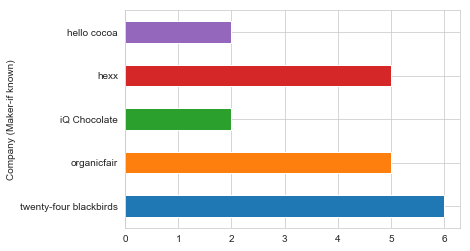

In [214]:
# Biểu đồ thể hiện top 5 công ty sản xuất nhiều nhất
company = data[['Company (Maker-if known)','Specific Bean Origin or Bar Name']].groupby('Company (Maker-if known)').count()

company.sort_values(by=['Company (Maker-if known)'], ascending=False)['Specific Bean Origin or Bar Name'].head(5).plot(kind='barh')

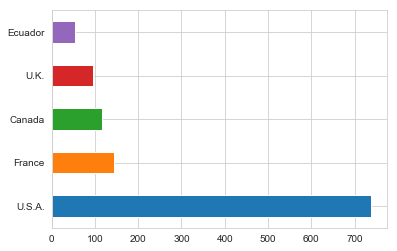

In [210]:
# Biểu đồ thể hiện top 5 khu vực sản xuất nhiều
data['Company Location'].value_counts().head(5).plot(kind='barh')

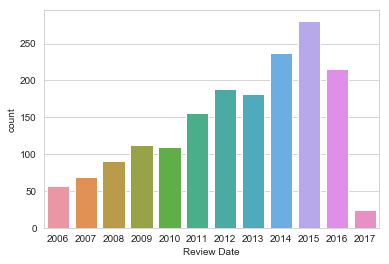

In [209]:
# Biểu đồ thể hiện số lượng review theo từng năm
sns.countplot(x='Review Date', data=data)

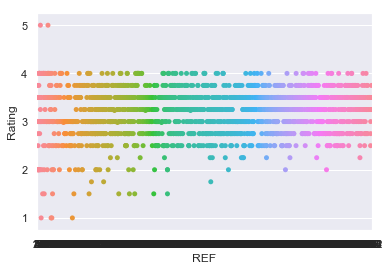

In [17]:
# Biểu đồ thể hiện số sản phẩm trên từng rating
sns.set()
product_rating=data.groupby('Rating').count().reset_index()
sns.stripplot(x='REF', y ='Rating', data = data)

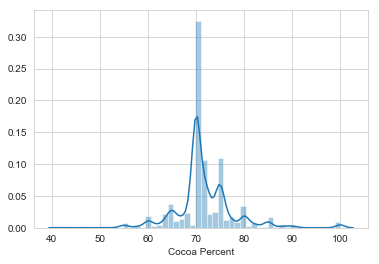

In [213]:
# Phân bố sản phẩm chứa phần trăm cocoa
sns.distplot(data['Cocoa Percent'])

In [27]:
data

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70,France,4.00,,Peru


In [32]:
# data.to_csv('1.csv')

In [ ]:
# Link data visual
# datastudio.google.com/reporting/dec818bc-d1d6-43e0-87d7-029f9b17f18d